# 03 Andmete liitmine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from wordcloud import WordCloud
from estnltk import Text
from tqdm import tqdm

In [2]:
delfi = pd.read_csv("data_delfi_UUS.csv")
telegram = pd.read_csv("data_telegram_UUS.csv")
uued = pd.read_csv("data_uueduudised_UUS.csv")

In [5]:
telegram.shape

(5074, 5)

In [6]:
# Andmestike ühendamine
data = pd.concat([delfi, telegram, uued])

In [7]:
data.shape

(17437, 5)

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(17437, 5)

In [10]:
data = data[(data.text != '') & (data.title != '') & (data.subject != '') & (data.date != '') ]

In [11]:
data.shape

(17437, 5)

In [12]:
# Andmete segamine
data = shuffle(data)
data = data.reset_index(drop=True)

In [13]:
data.to_csv('data_uudised_koos_UUS.csv', index = False)

subject
Delfi              5304
Eesti Päevaleht     815
Forte                61
Maaleht              16
Telegram           5074
Uued Uudised       6000
Ärileht             167
Name: text, dtype: int64


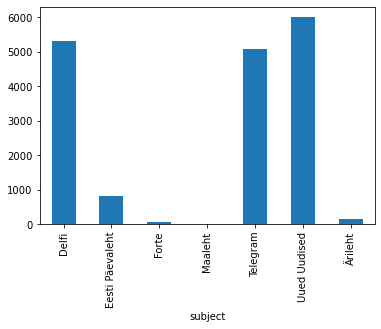

In [14]:
# Artikleid väljaannete kaupa
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

# Sõnapilved

In [15]:
#https://et.wikipedia.org/wiki/Sides%C3%B5na
#https://www.taskutark.ee/m/asesonad/
#sidesõnad
stopsõnad = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni']
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju']

## Nimi- ja omadussõnade sõnapilv

In [16]:
nimi_omadus_sonad = []
for i in tqdm(range (0, len(data))):
    rida = data.iloc[i]
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U' or sona[0][1] == 'D':
            nimi_omadus_sonad.append(sona[0][0])

nimi_omadus_words = ' '.join(map(str, nimi_omadus_sonad))

100%|██████████████████████████████████████████████████████████████████████████| 17437/17437 [3:02:05<00:00,  1.60it/s]


(-0.5, 799.5, 499.5, -0.5)

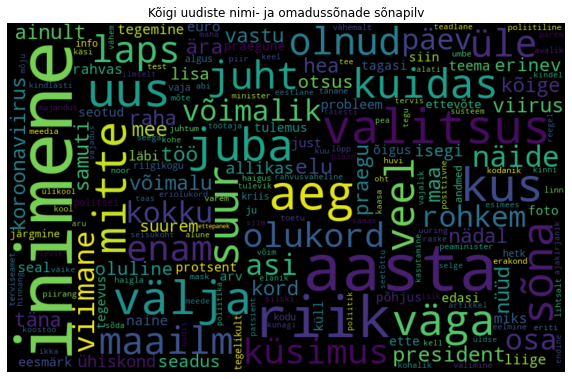

In [17]:
wordcloud_nimi_omadus = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(nimi_omadus_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_nimi_omadus, interpolation='bilinear')
plt.title("Kõigi uudiste nimi- ja omadussõnade sõnapilv")
plt.savefig('Kõigi_uudiste_nimi_omadus_sõnapilv.png')
plt.axis("off")

## Verbide sõnapilv

In [18]:
verb_sonad = []
for i in tqdm(range (0, len(data))):
    rida = data.iloc[i]
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'V': #or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U' or sona[0][1] == 'D':
            verb_sonad.append(sona[0][0])

verb_words = ' '.join(map(str, verb_sonad))

100%|██████████████████████████████████████████████████████████████████████████| 17437/17437 [1:24:30<00:00,  3.44it/s]


Verbe sõnapilves:  1327270


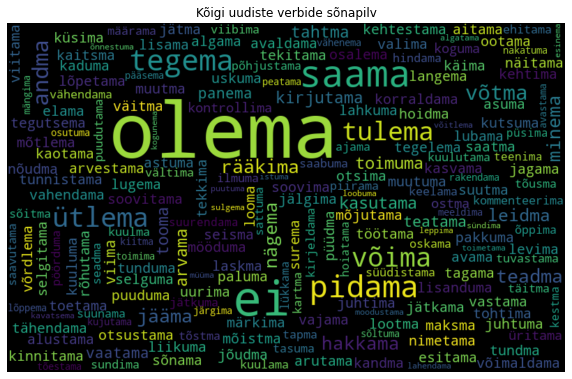

In [19]:
wordcloud_verb = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(verb_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_verb, interpolation='bilinear')
plt.title("Kõigi uudiste verbide sõnapilv")
plt.savefig('Kõigi_uudiste_sõnapilv_verb_sonad_UUS.png')
plt.axis("off")
print("Verbe sõnapilves: ", len(verb_sonad))